Benchmarking QuTiP (N=2 to 14)
N = 2 Done. Time: 0.1110 seconds
N = 3 Done. Time: 0.0055 seconds
N = 4 Done. Time: 0.0154 seconds
N = 5 Done. Time: 0.0177 seconds
N = 6 Done. Time: 0.0533 seconds
N = 7 Done. Time: 0.2818 seconds
N = 8 Done. Time: 0.3846 seconds
N = 9 Done. Time: 1.1026 seconds
N = 10 Done. Time: 3.1767 seconds
N = 11 Done. Time: 9.8687 seconds
N = 12 Done. Time: 30.3040 seconds
N = 13 Done. Time: 91.4691 seconds
N = 14 Done. Time: 264.0162 seconds
Execution Times: [0.111, 0.0055, 0.0154, 0.0177, 0.0533, 0.2818, 0.3846, 1.1026, 3.1767, 9.8687, 30.304, 91.4691, 264.0162]


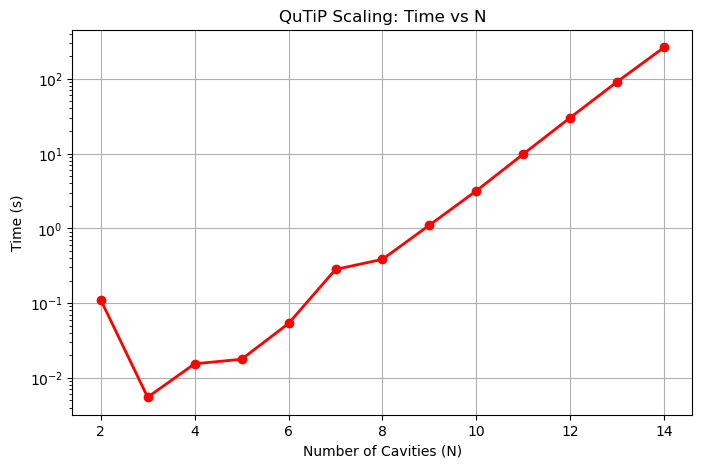

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
from qutip import *

# Function to Build System
def build_chain_hamiltonian(N, wc, g, cutoff):
    # Operators
    id_op = qeye(cutoff)
    a_op = destroy(cutoff)
    
    H = 0
    
    # Self-Energy
    for i in range(N):
        op_list = [id_op] * N 
        op_list[i] = a_op.dag() * a_op
        H += wc * tensor(op_list)

    # Hopping
    for i in range(N - 1):
        op_list_1 = [id_op] * N
        op_list_1[i] = a_op.dag()
        op_list_1[i+1] = a_op
        
        op_list_2 = [id_op] * N
        op_list_2[i] = a_op
        op_list_2[i+1] = a_op.dag()
        
        H += -g * (tensor(op_list_1) + tensor(op_list_2))
        
    # Initial State |1, 0, 0...>
    psi_list = [basis(cutoff, 0)] * N
    psi_list[0] = basis(cutoff, 1)
    psi0 = tensor(psi_list)
    
    return H, psi0

# Benchmarking Loop
cavity_counts = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
execution_times = []

# Params
wc = 1.0
g = 0.1
cutoff = 3 
tlist = np.linspace(0, 50, 100)

print(f"Benchmarking QuTiP (N=2 to 14)")

for N in cavity_counts:
    print(f"N = {N}", end="")
    
    start_time = time.time()
    
    H, psi0 = build_chain_hamiltonian(N, wc, g, cutoff)
    
    # Observables
    n_ops = []
    for i in range(N):
        op_list = [qeye(cutoff)] * N
        op_list[i] = num(cutoff)
        n_ops.append(tensor(op_list))
    
    # Run
    mesolve(H, psi0, tlist, [], n_ops)

    end_time = time.time()
    elapsed = end_time - start_time
    
    execution_times.append(round(elapsed, 4)) 
    
    print(f" Done. Time: {elapsed:.4f} seconds")



print("Execution Times:", execution_times)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(cavity_counts, execution_times, 'o-', linewidth=2, color='red')
plt.title(f"QuTiP Scaling: Time vs N")
plt.xlabel("Number of Cavities (N)")
plt.ylabel("Time (s)")
plt.grid(True)
plt.yscale('log')
plt.show()